In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [383]:
df=pd.read_csv('gapminder(1).csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [384]:
df.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

In [385]:
df['hue'] = df['country'].apply(lambda x: 'Ireland' if x == 'Ireland' else 'Other Countries')


In [386]:
df_02=df[df.year==2002].copy()
df_irl=df[(df.country=='Ireland')&(df.year==2002)].copy()

In [387]:
df_02['pop_bins'] = pd.qcut(df_02['pop'], q=5,labels=['0.2','0.4','0.6','0.8','1.0'] )


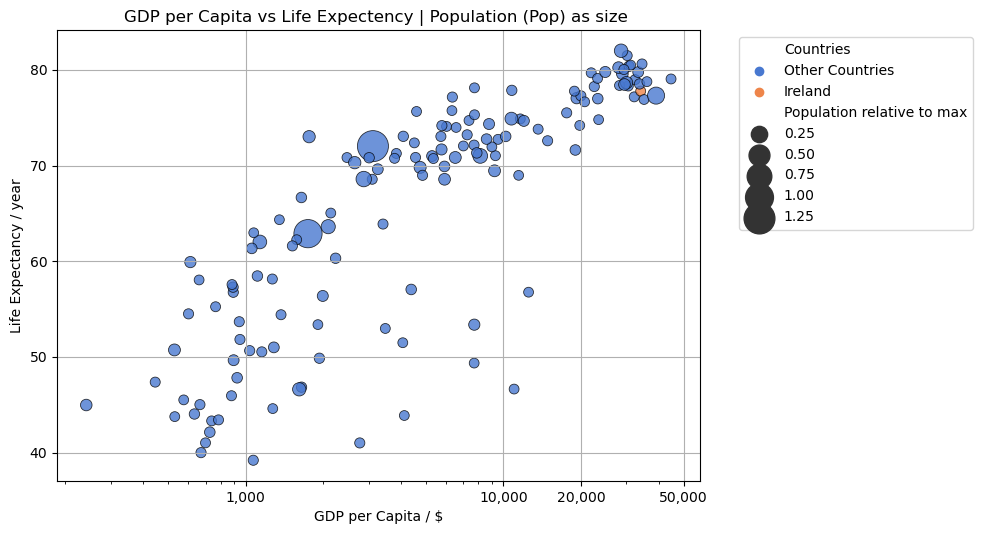

In [388]:
# Chart 1
plt.figure(figsize=(8.3 ,11.7/2))
# plt.scatter(df_irl.gdpPercap,df_irl.lifeExp,facecolor='none',
#             edgecolors='black',linewidths=1,s=30)
sns.scatterplot(data=df_02, x='gdpPercap', y='lifeExp',
                    size=df_02['pop'], sizes=(50, 500), hue='hue',
                    palette='muted',edgecolor='black', legend=True, alpha=0.8)

plt.title('GDP per Capita vs Life Expectency | Population (Pop) as size ')
plt.xlabel('GDP per Capita / $')
plt.xscale('log')  # Log scale for GDP
plt.ylabel('Life Expectancy / year')
plt.grid()
plt.legend()
plt.xticks([1000,10000,20000,50000],['1,000','10,000','20,000','50,000'])
handles, labels = plt.gca().get_legend_handles_labels()
labels=['Countries','Other Countries','Ireland','Population relative to max',
 '0.25','0.50','0.75','1.00', '1.25']
plt.legend(handles,labels,bbox_to_anchor=(1.05,1))
plt.show()

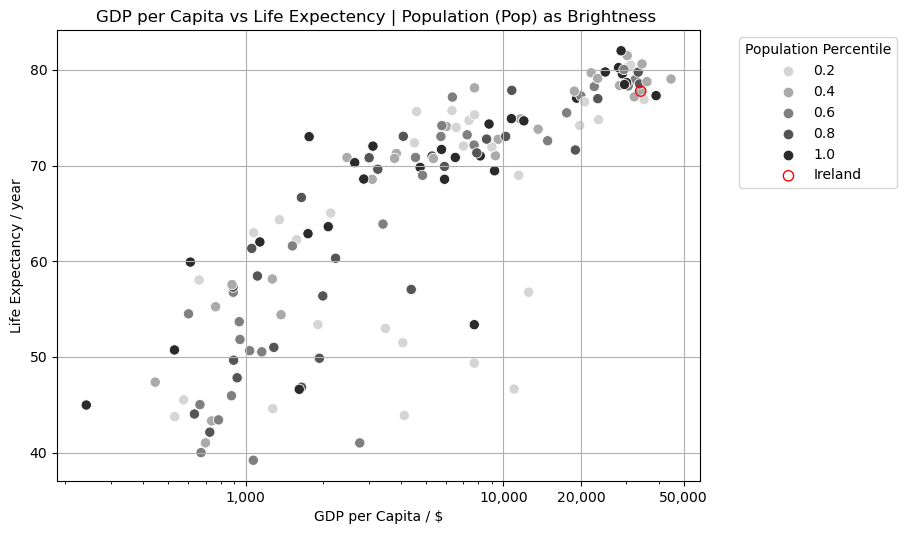

In [389]:
#Chart 2
plt.figure(figsize=(8.3 ,11.7/2))
sns.scatterplot(data=df_02, x='gdpPercap', y='lifeExp',
                    s=55, hue='pop_bins',
                    palette='binary', legend=True, alpha=1)

plt.scatter(df_irl['gdpPercap'], df_irl['lifeExp'],
             s=55, label='Ireland', edgecolor='red',facecolor='none')

plt.title('GDP per Capita vs Life Expectency | Population (Pop) as Brightness ')
plt.xlabel('GDP per Capita / $')
plt.xscale('log')  # Log scale for GDP
plt.xticks([1000,10000,20000,50000],['1,000','10,000','20,000','50,000'])
plt.ylabel('Life Expectancy / year')
plt.grid()
plt.legend(title='Population Percentile',bbox_to_anchor=(1.05,1))
plt.show()

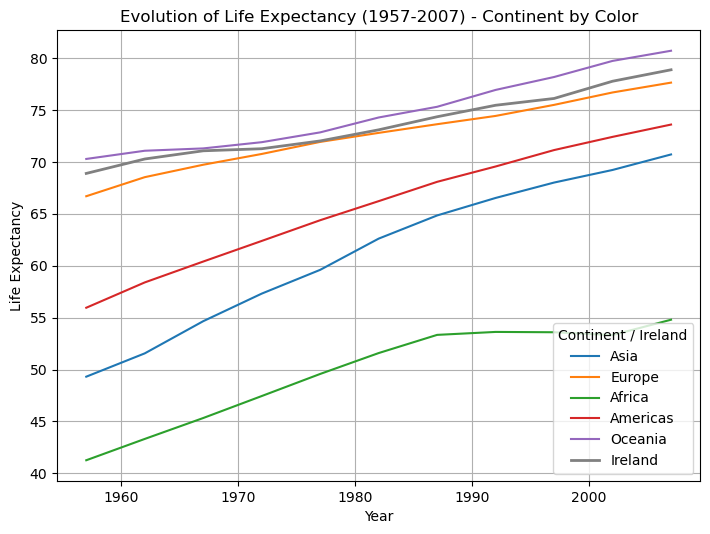

In [390]:
#B
df_continent = df[(df['year'] >= 1957) & (df['year'] <= 2007)]

plt.figure(figsize=(8.3 ,11.7/2))
sns.lineplot(data=df_continent, x='year', y='lifeExp', hue='continent',ci=None)
sns.lineplot(data=df_continent[df_continent['country'] == 'Ireland']
             , x='year', y='lifeExp', color='gray', linewidth=2, label='Ireland')

plt.title('Evolution of Life Expectancy (1957-2007) - Continent by Color')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Continent / Ireland')
plt.grid(True)
plt.show()

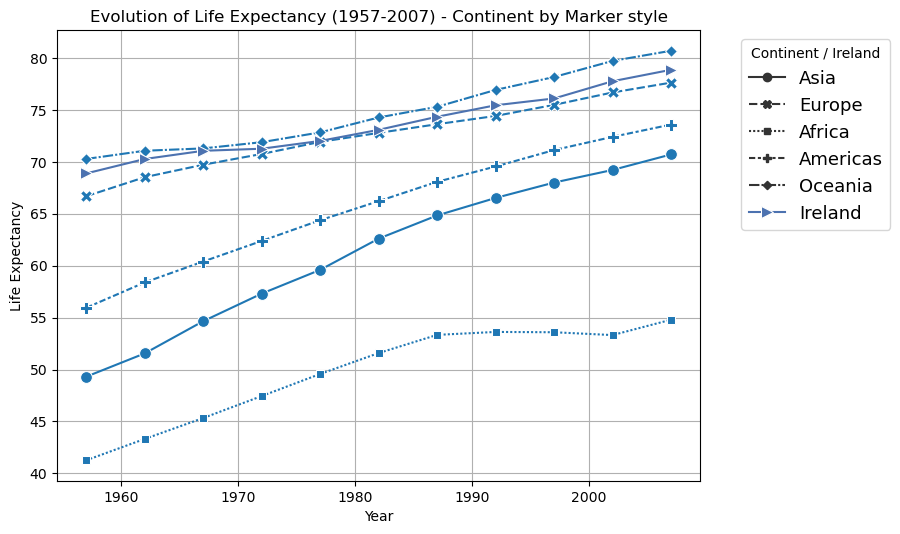

In [391]:
#Chart 5
df_continent = df[(df['year'] >= 1957) & (df['year'] <= 2007)]

plt.figure(figsize=(8.3 ,11.7/2))
sns.lineplot(data=df_continent, x='year', y='lifeExp',
             style='continent',markers=True,markersize=8.5,ci=None,linewidth=1.5)
sns.lineplot(data=df_continent[df_continent['country'] == 'Ireland']
             , x='year', y='lifeExp', color='#4C72B0', linewidth=1.5,marker='>',markersize=8.5, label='Ireland')

plt.title('Evolution of Life Expectancy (1957-2007) - Continent by Marker style')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Continent / Ireland',fontsize=13,bbox_to_anchor=(1.05,1))
plt.grid(True)
plt.show()

C:\Users\daims\AppData\Local\Temp\ipykernel_16404\4122835514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continent['year_jittered'] = df_continent['year'] + np.random.uniform(-0.8, 0.8, size=len(df_continent))


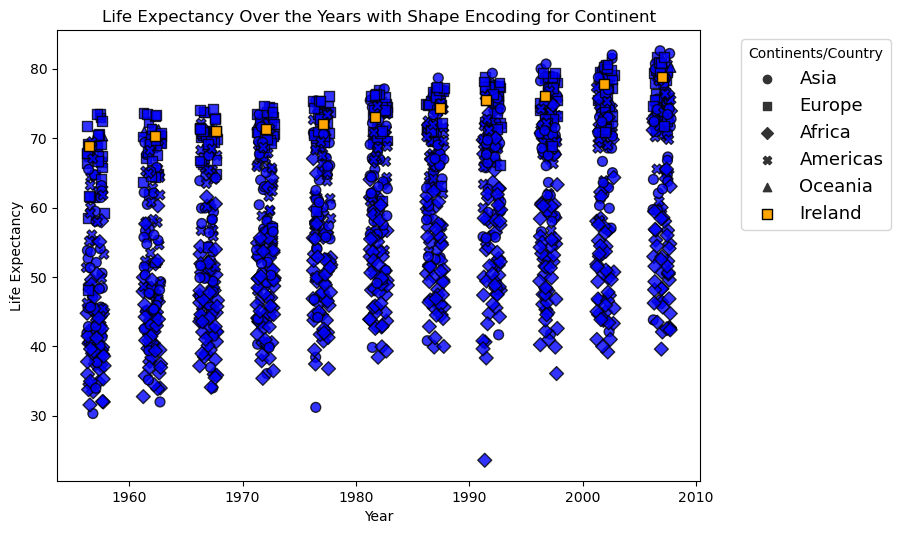

In [392]:

#chart 6
plt.figure(figsize=(8.3 ,11.7/2))
markers = {"Asia": "o", "Europe": "s", "Africa": "D", "Americas": "X", "Oceania": "^"}

np.random.seed(42) 
df_continent['year_jittered'] = df_continent['year'] + np.random.uniform(-0.8, 0.8, size=len(df_continent))
sns.scatterplot(data=df_continent, x='year_jittered', y='lifeExp', style='continent',color='blue',linewidth=1,edgecolor='black', markers=markers,alpha=0.8, s=50)
# sns.scatterplot(data=df_continent[df_continent.country=='Ireland'], x='year_jittered', y='lifeExp' ,color='orange', markers=markers,edgecolor='black',label='Ireland', s=50)
plt.scatter(df_continent[df_continent.country=='Ireland'].year_jittered,df_continent[df_continent.country=='Ireland'].lifeExp,
                marker='s', s=50,
                facecolor='orange',edgecolor='black', label='Ireland')

# handles, labels = plt.gca().get_legend_handles_labels()
# labels[-1]='Ireland'
plt.title('Life Expectancy Over the Years with Shape Encoding for Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Continents/Country',fontsize=13,bbox_to_anchor=(1.05,1))
plt.show()


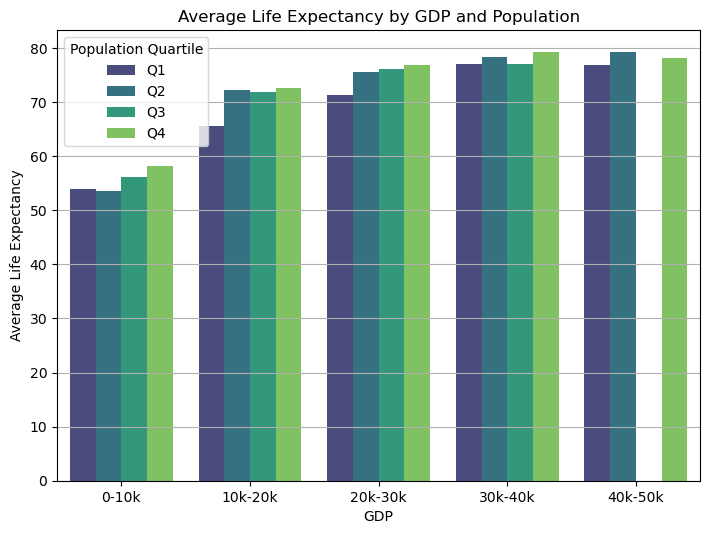

In [393]:
plt.figure(figsize=(8.3 ,11.7/2))


gdp_bins = [0, 10000, 20000, 30000, 40000, 50000]
gdp_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k']
df['gdp_bin'] = pd.cut(df['gdpPercap'], bins=gdp_bins, labels=gdp_labels)
df['pop_quartile'] = pd.qcut(df['pop'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
avg_life_exp = df.groupby(['gdp_bin', 'pop_quartile'])['lifeExp'].mean().reset_index()

sns.barplot(data=avg_life_exp, x='gdp_bin', y='lifeExp', hue='pop_quartile', palette='viridis')
plt.title('Average Life Expectancy by GDP and Population')
plt.xlabel('GDP')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Population Quartile')
plt.grid(axis='y')
plt.show()
